In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.set(font_scale=1)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [ ]:
data = pd.read_csv('/content/Survei_Medsos.csv')
data

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
4,Laki-laki,Pelajar/Mahasiswa,LINE,WA,11-30 menit,> 3 jam,2,2,3,2,2,4,2,Pernah,Tidak,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
107,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
108,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
109,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [ ]:
data.columns

Index(['Jenis_Kelamin', 'Pekerjaan', 'Sering', 'Lupa_Waktu',
       'Waktu_Sekali_Pakai', 'Waktu_Harian', 'Fomo'],
      dtype='object')

In [ ]:
data = data[['Jenis_Kelamin', 'Pekerjaan', 'Sering', 'Lupa_Waktu', 'Waktu_Sekali_Pakai', 'Waktu_Harian', 'Fomo']].copy()
data.head()

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Fomo
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,4
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3
3,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,2
4,Laki-laki,Pelajar/Mahasiswa,LINE,WA,11-30 menit,> 3 jam,2


In [ ]:
#cek data nul
is_na = data.isna().all(axis=0)
is_na

Jenis_Kelamin                               False
Pekerjaan                                   False
Sering                                      False
Lupa_Waktu                                  False
Waktu_Sekali_Pakai                          False
Waktu_Harian                                False
Mengganggu_Produktivitas                    False
Membuang_Waktu                              False
Tidak_Bisa_Kontrol_Diri                     False
Tidak_Sadar_Waktu                           False
Fomo                                        False
Tanpa_Tujuan                                False
Terpikirkan                                 False
Usaha_Melepaskan_Diri                       False
Kesulitan_Melepaskan_Diri                   False
Butuh_Aplikasi                              False
Pernah_Memakai_Aplikasi_Pengaturan_Waktu    False
dtype: bool

In [ ]:
#cek data duplikat
data_duplicate = data.drop_duplicates(inplace = True)
print(data_duplicate)

None


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 117
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Jenis_Kelamin       106 non-null    object
 1   Pekerjaan           106 non-null    object
 2   Sering              106 non-null    object
 3   Lupa_Waktu          106 non-null    object
 4   Waktu_Sekali_Pakai  106 non-null    object
 5   Waktu_Harian        106 non-null    object
 6   Fomo                106 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.6+ KB


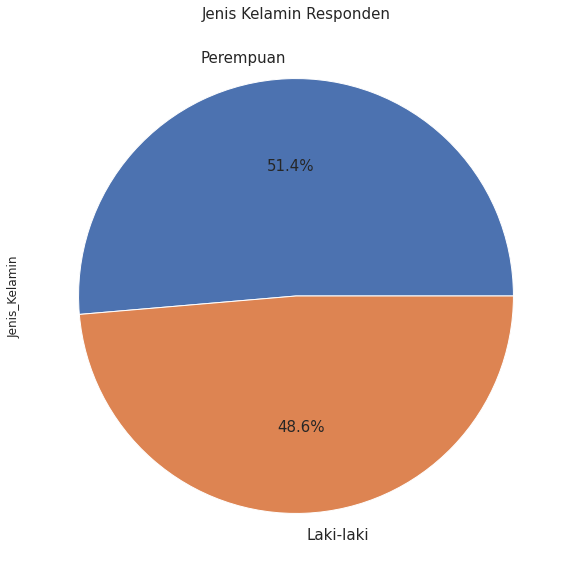

In [ ]:
#Jenis Kelamin Responden
ax = data['Jenis_Kelamin'].value_counts().plot.pie(figsize=(10,10), autopct='%.1f%%', fontsize=15)
plt.title('Jenis Kelamin Responden', fontsize=15)
plt.show()

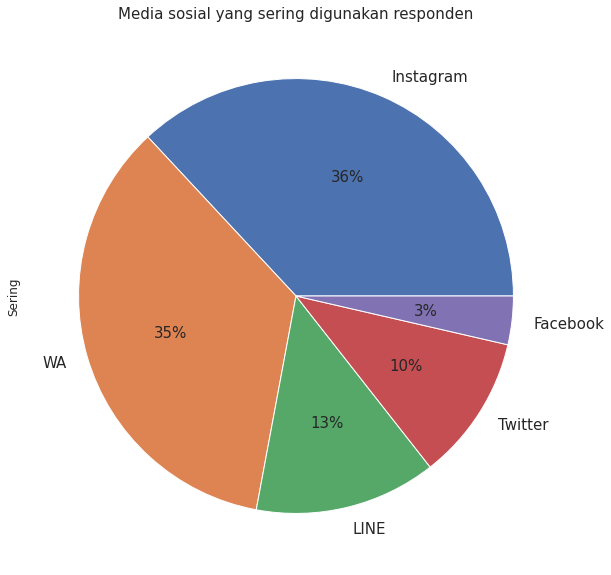

In [ ]:
#Media Sosial yang sering digunakan responden
data['Sering'].value_counts().plot.pie(figsize=(10,10), autopct='%d%%', fontsize=15)
plt.title('Media sosial yang sering digunakan responden', fontsize=15)
plt.show()

In [ ]:
#Profesi Responden
data['Pekerjaan'].value_counts().plot.pie(figsize=(10,10), autopct='%.1f%%', fontsize=10)
plt.title('Pekerjaan', fontsize=15)
plt.show()

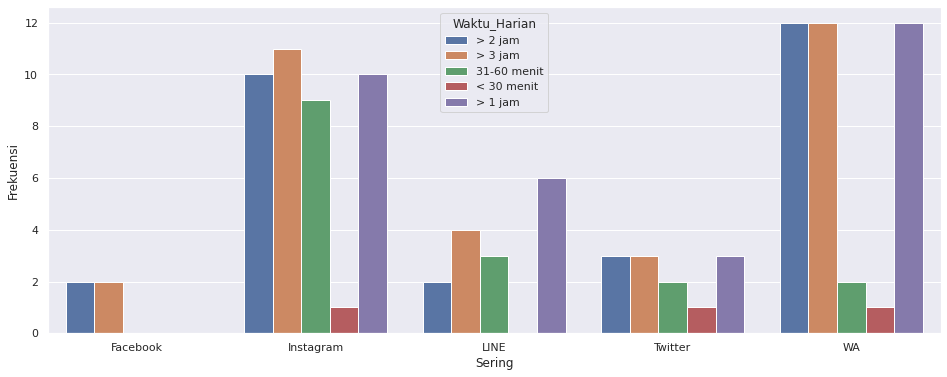

In [ ]:
#waktu harian yang digunakan pada media sosial yang sering digunakan
waktu_harian = data[['Sering','Waktu_Harian','Lupa_Waktu']].groupby(['Sering','Waktu_Harian']).agg('count').copy()
waktu_harian.columns = ['Frekuensi']

test = waktu_harian.reset_index()
ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Sering', y='Frekuensi', hue='Waktu_Harian', data=test)
plt.show()

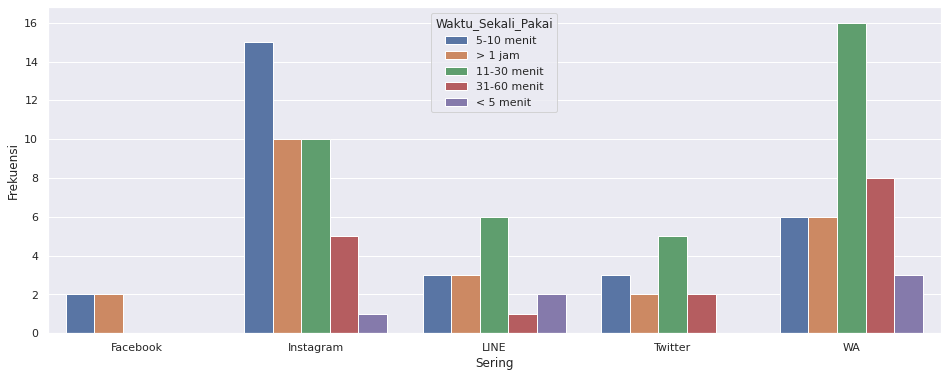

In [ ]:
#waktu sekali pakai yang digunakan pada media sosial yang sering digunakan
waktu_sekali_pakai = data[['Sering','Waktu_Sekali_Pakai','Lupa_Waktu']].groupby(['Sering','Waktu_Sekali_Pakai']).agg('count').copy()
waktu_sekali_pakai.columns = ['Frekuensi']

test = waktu_sekali_pakai.reset_index()
ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Sering', y='Frekuensi', hue='Waktu_Sekali_Pakai', data=test)
plt.show()

### Korelasi Fomo dengan waktu harian

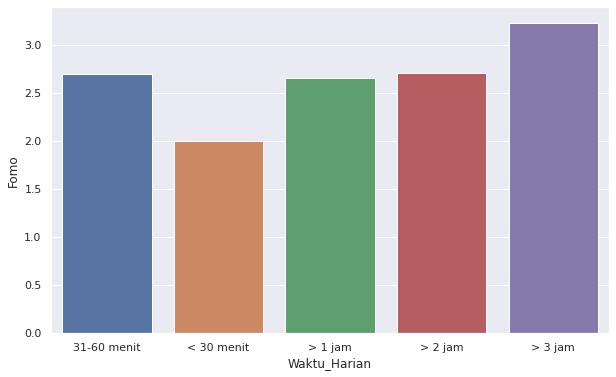

In [ ]:
#Barchart fitur Waktu_Harian dengan Fomo
corr_1 = data.groupby('Waktu_Harian')['Fomo'].mean()
ax = plt.subplots(figsize=(10,6))
sns.barplot(x=corr_1.index, y=corr_1.values)
plt.ylabel('Fomo')
plt.show()

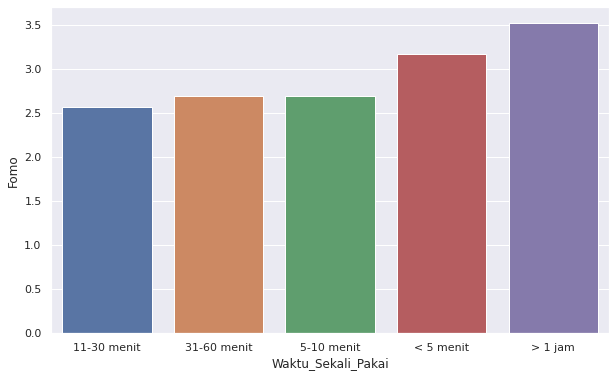

In [ ]:
#Bar chart fitur Waktu_Sekali_Pakai dengan Fomo
corr_2 = data.groupby('Waktu_Sekali_Pakai')['Fomo'].mean()
ax = plt.subplots(figsize=(10,6))
sns.barplot(x=corr_2.index, y=corr_2.values)
plt.ylabel('Fomo')
plt.show()

### Uji korelasi antar fitur

In [ ]:
data = pd.read_csv('/content/Survei_Medsos.csv')
data

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
4,Laki-laki,Pelajar/Mahasiswa,LINE,WA,11-30 menit,> 3 jam,2,2,3,2,2,4,2,Pernah,Tidak,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
107,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
108,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
109,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


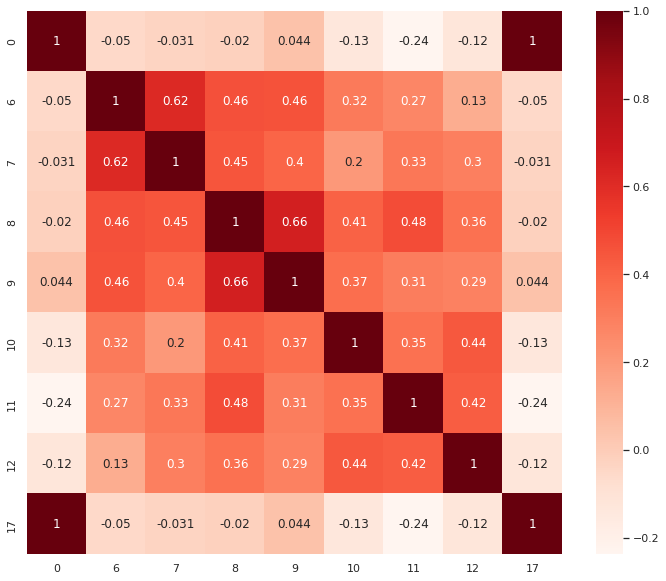

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data_standarded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
corr = abs(corr[17].drop([17]))
corr

0     1.000000
6     0.050414
7     0.031188
8     0.019752
9     0.044130
10    0.134476
11    0.237593
12    0.123963
Name: 17, dtype: float64

In [ ]:
corr_index = corr[corr>0.5].index
corr_reduction = data_standarded[corr_index]
corr_reduction

,0
0,1
1,1
2,2
3,1
4,1
...,...
106,1
107,1
108,1
109,1


In [ ]:
quantile = corr_reduction.quantile([0.25, 0.75])
quantile = quantile.drop(0, axis=1)
quantile

""
0.25
0.75


In [ ]:
iqr = quantile.iloc[1]-quantile.iloc[0]
iqr

Series([], dtype: float64)

In [ ]:
quantile.loc[0.25] = quantile.loc[0.25]-iqr*1.5
quantile.loc[0.75] = quantile.loc[0.75]+iqr*1.5

lower = corr_reduction >=quantile.loc[0.25]
upper = corr_reduction <=quantile.loc[0.75]
corr_reduction[(lower & upper)]

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
106,NaN
107,NaN
108,NaN
109,NaN


### Standarisasi Data

In [ ]:
data = pd.read_csv('/content/Survei_Medsos.csv', delimiter=',')
data

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
4,Laki-laki,Pelajar/Mahasiswa,LINE,WA,11-30 menit,> 3 jam,2,2,3,2,2,4,2,Pernah,Tidak,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
107,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
108,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
109,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [ ]:
code = 1
for i in data.loc[:,'Jenis_Kelamin'].unique():
  data['Jenis_Kelamin'].loc[data['Jenis_Kelamin']==i] = code
  code += 1
data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,1,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,1,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,2,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,1,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
4,1,Pelajar/Mahasiswa,LINE,WA,11-30 menit,> 3 jam,2,2,3,2,2,4,2,Pernah,Tidak,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
107,1,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
108,1,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
109,1,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [ ]:
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].astype('int64')
data

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,1,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,1,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,2,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,1,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
4,1,Pelajar/Mahasiswa,LINE,WA,11-30 menit,> 3 jam,2,2,3,2,2,4,2,Pernah,Tidak,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
107,1,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
108,1,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
109,1,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [ ]:
from sklearn.preprocessing import StandardScaler

data_standarded = pd.DataFrame(data)
data_standarded = pd.concat([data_standarded, data['Jenis_Kelamin']], ignore_index=True, axis=1)
data_standarded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya,1
1,1,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak,1
2,2,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak,2
3,1,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak,1
4,1,Pelajar/Mahasiswa,LINE,WA,11-30 menit,> 3 jam,2,2,3,2,2,4,2,Pernah,Tidak,Ya,Tidak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya,1
107,1,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak,1
108,1,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya,1
109,1,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak,1
